In [ ]:
%load_ext autoreload
%autoreload 

In [ ]:
import online_retail_analysis.utils.paths as path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,MiniBatchKMeans, AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

sns.set_style("whitegrid")
%matplotlib inline
pd.options.display.float_format = '{:,.3f}'.format

In [ ]:
df = pd.read_excel(path.data_raw_dir('Online Retail.xlsx')) 
#encoding = 'unicode_escape', engine ='python'
df.sample(5)

In [ ]:
df.info()#see the information

In [ ]:
df_proces = df.copy() # create a copy the data
df_proces.isna().sum() # see the number of row whit NaN

In [ ]:
df_proces.duplicated().sum() #see the number of row duplicated

In [ ]:

df_proces.drop_duplicates(inplace=True) # remove the duplicated

df_proces.describe() # look the a little statistics 


In [ ]:
print('Number of customers: {}'.format(len(df_proces.CustomerID.unique())))

print('Number of customers: {}'.format(len(df_proces.Country.unique())))

df_proces.Country.value_counts()


In [ ]:
df_proces.sample(5)

In [ ]:
df_proces['date']= pd.to_datetime(df_proces['InvoiceDate'])
df_proces['month'] = df_proces['date'].dt.month
df_proces['days'] = df_proces['date'].dt.day_name()
df_proces

In [ ]:
from online_retail_analysis.features.build_features import Calculate_RFM
df_rfm_labeling = Calculate_RFM(df_proces,labels=True)
df_rfm_labeling


In [ ]:
df_rfm_labeling['label'].value_counts()

In [ ]:
segmentation1=df_rfm_labeling.groupby('label')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(17,8))
segmentation1.drop([0],inplace=False)
sns.barplot(data=segmentation1, x="label", y="CustomerID", palette = "Set3")

In [20]:
df_rfm = Calculate_RFM(df_proces,labels=False)

new_rfm = df_rfm.drop('CustomerID', axis=1)

new_rfm.head()


,Recency,MonetaryValue,Frequency
0,326,0.000,2
1,2,"4,310.000",182
2,75,"1,797.240",31
3,19,"1,757.550",73
4,310,334.400,17


Recency's: Skew: 1.2492366479193797, : SkewtestResult(statistic=26.764041761447558, pvalue=8.475987604630752e-158)
Frequency's: Skew: 18.087877538361507, : SkewtestResult(statistic=83.87019363355928, pvalue=0.0)
MonetaryValue's: Skew: 21.697336771182634, : SkewtestResult(statistic=87.89411366804723, pvalue=0.0)


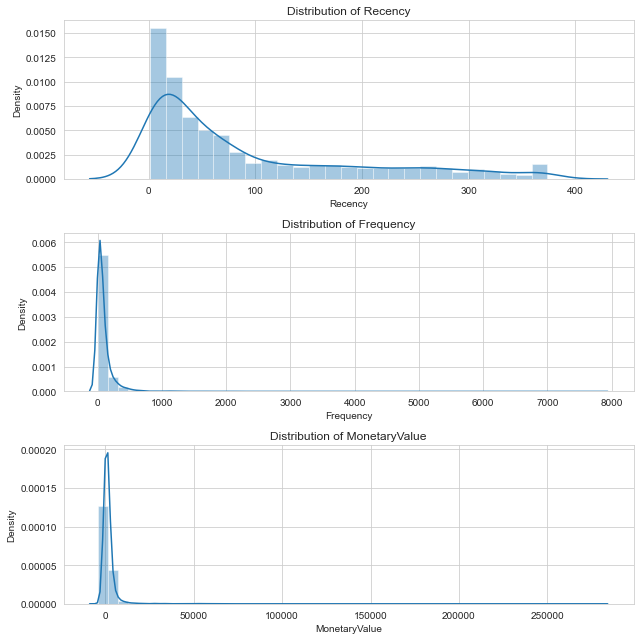

In [26]:
from online_retail_analysis.features.build_features import check_skew

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(new_rfm,'Recency')

plt.subplot(3, 1, 2)
check_skew(new_rfm,'Frequency')

plt.subplot(3, 1, 3)
check_skew(new_rfm,'MonetaryValue')

plt.tight_layout()
plt.savefig(path.reports_figures_dir('before_transform.png'), format='png', dpi=1000)


WindowsPath('d:/repos/online_retail_analysis/reports/figures')